In [ ]:
pip install --upgrade numpy pandas scikit-learn ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pa

# Regression Analysis of Bacterial Growth

## Introduction

In this project, we aim to predict bacterial growth parameters (`a`, `mu`, `tau`, `a0`) using environmental and experimental features such as `n_cyanos`, `co2`, `light`, and `SucRatio`.

The goals are:
- Explore the dataset and understand feature-target relationships
- Preprocess the data appropriately
- Develop multiple machine learning pipelines with hyperparameter tuning
- Evaluate and compare model performance
- Discuss findings and identify the best-performing models

## Exploratory Data Analysis (EDA)

We first examine the structure, distribution and relationships in the dataset. This helps identify:
- Missing values
- Feature distributions
- Correlations between features and targets
- Potential preprocessing requirements


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df2 = pd.read_csv("/content/drive/MyDrive/fitting-results.csv")

# Quick overview
print("Dataset shape:", df2.shape)
print(df2.info())
print(df2.describe())

# Check for missing values
print("Missing values:\n", df2.isnull().sum())

Mounted at /content/drive
Dataset shape: (19992, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
 7   tau       19992 non-null  float64
 8   a0        19992 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB
None
           n_cyanos           co2         light      SucRatio       Nsample  \
count  19992.000000  19992.000000  19992.000000  19992.000000  19992.000000   
mean     494.367547     49.890457      0.495162      0.496075   9997.371349   
std      288.957886     29.138328      0.289767      0.289731   5772.058433   
min        2.000000      0.001000      0

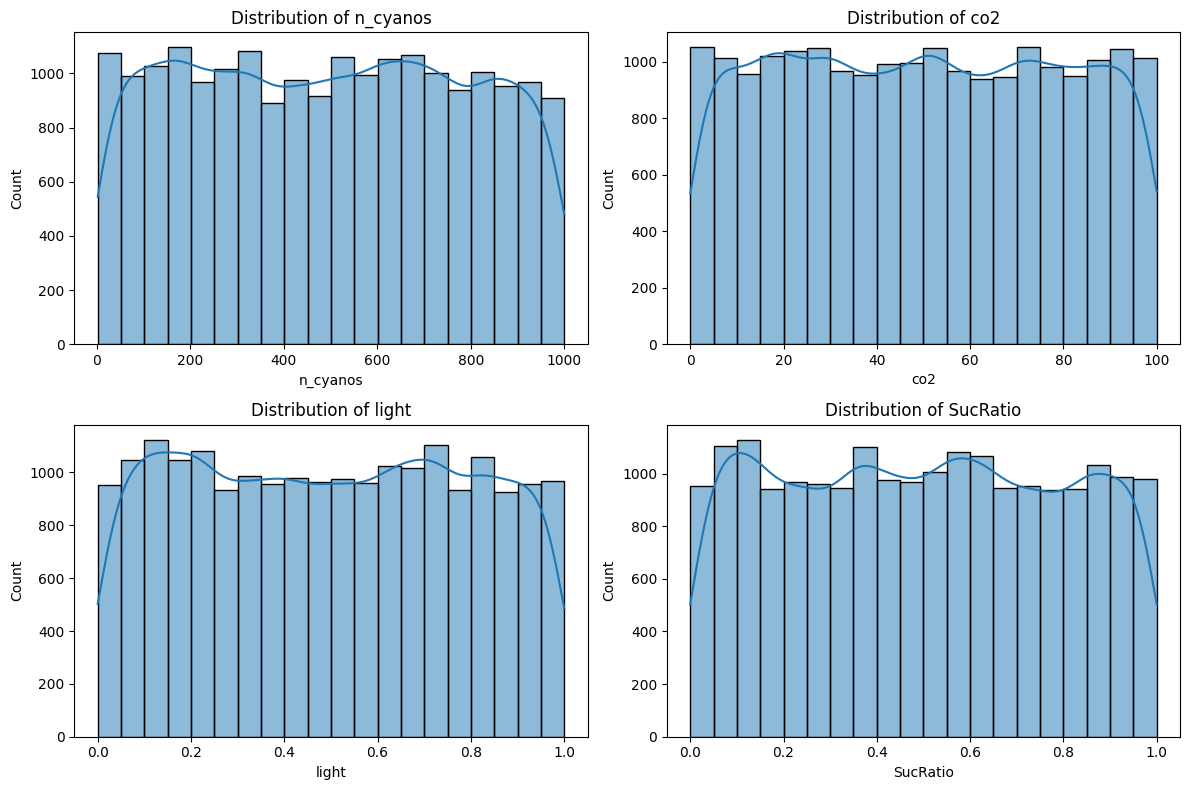

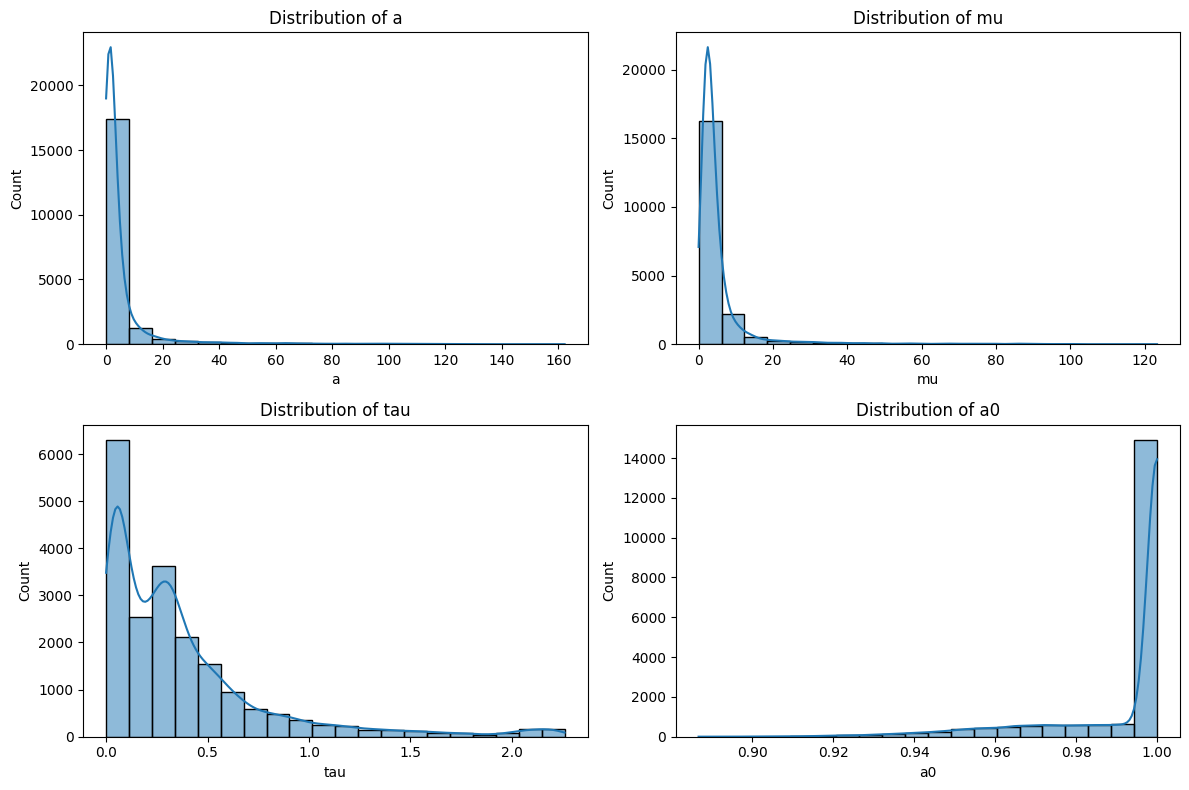

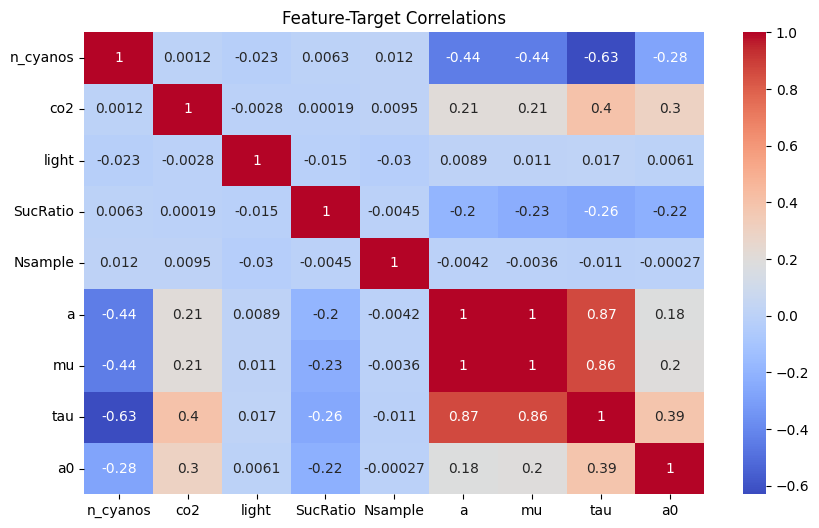

In [ ]:
# Feature histograms
features = ['n_cyanos', 'co2', 'light', 'SucRatio']
targets = ['a', 'mu', 'tau', 'a0']

plt.figure(figsize=(12,8))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.histplot(df2[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Target distributions
plt.figure(figsize=(12,8))
for i, col in enumerate(targets):
    plt.subplot(2,2,i+1)
    sns.histplot(df2[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title("Feature-Target Correlations")
plt.show()

### Observations from EDA:
- Features operate on different scales, suggesting that scaling will be necessary for some models.
- Target variables show skewed distributions.
- No missing values were found, simplifying preprocessing.

#### Correlation Analysis

The correlation heatmap reveals several important patterns relevant to model design:

- The target variables (`a`, `mu`, `tau`, `a0`) are **strongly correlated with each other**, particularly `a` and `mu`. This indicates that these growth parameters are closely related biologically. However, they must not be used as features when predicting one another as this would constitute data leakage.

- Among the input features, `n_cyanos` shows a **moderate to strong negative correlation** with `a`, `mu` and `tau`. This suggests that higher initial cyano bacteria counts may lead to shorter growth delays.

- `co2` shows a **moderate positive correlation** with most target variables, indicating that carbon dioxide availability plays a meaningful role in bacterial growth.

- `SucRatio` shows a weaker but consistent negative correlation with the targets, suggesting a secondary influence on growth behaviour.

- `light` and `Nsample` display **near-zero correlation** with all targets, indicating little linear relationship.

- The input features show **low inter-correlation**, reducing concerns about multicollinearity and making the dataset suitable for both linear and non-linear regression models.

## Data Preprocessing

The purpose of preprocessing is to prepare the dataset for fair and reproducible machine learning experimentation. This includes ensuring that only valid input features are used, preventing data leakage, handling differences in feature scales and setting up a clean experimental pipeline that support rigorous model comparison.

All preprocessing decisions are informed by the exploratory data analysis (EDA) and are implemented using scikit learn pipelines. As part of the preprocessing, the below process was performed on the dataset.

### Feature Selection and Data Leakage Prevention

The dataset contains four environmental and experimental input variables (`n_cyanos`, `co2`, `light`, `SucRatio`, `Nsample`) and four growth related output variables (`a`, `mu`, `tau`, `a0`). Each growth parameter represents a distinct regression target.

When predicting a given target variable, the remaining growth parameters are explicitly excluded from the feature set. Although, EDA revealed very strong correlations among the target variables (for example, between `a` and `mu`), including them as predictors would result in severe data leakage and unrealistically optimistic performance estimates. Therefore, each target is modelled independently using only environmental input features.

Additionally, the variable `Nsample` was removed from the feature set. This variable represents an experiment identifier rather than a physical or biological measurement and exhibited near zero correlation with all target variables during EDA. Retaining it would not provide meaningful predictive information and could introduce spurious patterns.




In [ ]:
# Input Features

X = df2[['n_cyanos', 'co2', 'light', 'SucRatio']]

# All target variables
targets = ['a', 'mu', 'tau', 'a0']

# Dictionary to store splits
data_splits = {}

for target in targets:
    y = df2[target]

    # Train (70%) and temp (30%)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.30, random_state=42
    )

    # Validation (15%) and Test (15%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, random_state=42
    )

    # Preprocessing pipeline
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Store everything
    data_splits[target] = {
        'X_train': X_train_scaled,
        'X_val': X_val_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    }


## Machine Learning Pipelines and Hyperparameter Tuning

Following preprocessing and dataset splitting, four distinct machine learning pipelines were developed to predict each of the bacterial growth parameters (`a`, `mu`, `tau`, `a0`). Each target variable was treated as an independent regression task and only the environmental features (`n_cyanos`, `co2`, `light`, `SucRatio`) were used as inputs in order to prevent data leakage.

The pipelines were designed to capture a range of possible relationships from simple linear effects to complex non-linear interactions. Specifically, the four pipelines implemented were:

1. **Linear Regression** - serves as a baseline model and provides interpretable coefficients for each feature.
2. **Polynomial Regression** - captures non-linear relationships between features and the target.
3. **Random Forest Regressor** - a tree based ensemble model capable of modelling feature interactions and non-linearities, robust to outliers and scale differences.
4. **Gradient Boosting Regressor** - a sequential ensemble method that incrementally reduces bias and is expected to perform particularly well on more complex targets.

Feature standardisation was applied within pipelines for models sensitive to feature scaling (Linear and Polynomial Regression).

### Hyperparameter Tuning

Hyperparameters were optimised using the validation set, while the test set remained untouched until final evaluation. For each pipeline, the following hyperparameters were explored:

- **Polynomial Regression**: `degree` = 2 or 3  
- **Random Forest**: `n_estimators` = 100, 200, 300 `max_depth` = None, 10, 20, 30 `min_samples_split` = 2, 3, 5  
- **Gradient Boosting**: `n_estimators` = 100, 200, 300 `learning_rate` = 0.05, 0.01, 0.1, `max_depth` = 2, 3, 5

Linear Regression contains no hyperparameters to tune. For each target, the model achieving the lowest RMSE on the validation set was selected as the best performing pipeline.

### Training and Evaluation Procedure

1. Each pipeline was trained on the training set.
2. Predictions were generated on the validation set for hyperparameter selection.
3. The final selected model per pipeline was evaluated on the test set using **Root Mean Squared Error (RMSE)** and **R² score**, providing a quantitative measure of model performance and comparing across pipelines.

This ensures that all models are fairly compared, prevents information leakage and provides a robust model for reporting final predictive performance on unseen data.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import ParameterGrid
import numpy as np

# PIPELINES

pipelines = {
    'Linear': Pipeline([('model', LinearRegression())]),
    'Polynomial': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),  # degree set during tuning
        ('model', LinearRegression())
    ]),
    'RandomForest': Pipeline([('model', RandomForestRegressor(random_state=42))]),
    'GradientBoosting': Pipeline([('model', GradientBoostingRegressor(random_state=42))])
}

# HYPERPARAMETER GRIDS

param_grids = {
    'Polynomial': {
        'poly__degree': [2, 3]
    },
    'RandomForest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 3, 5]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.05, 0.01, 0.1],
        'model__max_depth': [2, 3, 5]
    }
}


## Evaluation

Two metrics were used to evaluate regression performance: **Root Mean Squared Error (RMSE)** and **R² (coefficient of determination)**. RMSE measures the average magnitude of prediction errors in the same units as the target, making it directly interpretable. It is sensitive to large errors, which is important for accurately predicting bacterial growth parameters.

R² complements RMSE by quantifying the proportion of variance in the target explained by the model. Values close to 1 indicate excellent predictive capability, while values near 0 indicate poor fit. Negative R² values indicate the model performs worse than simple predicting the mean.

These metrics are widely used in microbial growth prediction studies. For example, Yildirim-Yalcin et al. (2025) developed a machine learning based regression approach to predict total mesophilic bacteria in spinach using RMSE and R² to evaluate model performance. Similarly, Tarlak (2024) used RMSE and R² to assess the accuracy of a machine learning software predicting *Pseudomonas spp.* growth dynamics in culture media.

In this study, Random Forest and Gradient Boosting achieved very low RMSE and very high R² across most targets, confirming their effectiveness.

They have been included in the References section below.



In [ ]:
# Dictionary to store final results
final_results = {}

for target in targets:
    print(f"Training pipelines for target: {target}")

    # Get preprocessed data
    X_train = data_splits[target]['X_train']
    X_val = data_splits[target]['X_val']
    X_test = data_splits[target]['X_test']

    y_train = data_splits[target]['y_train']
    y_val = data_splits[target]['y_val']
    y_test = data_splits[target]['y_test']

    final_results[target] = {}

    for name, pipe in pipelines.items():
        best_model = None
        best_rmse = np.inf

        # If pipeline has hyperparameters
        if name in param_grids:
            for params in ParameterGrid(param_grids[name]):
                pipe.set_params(**params)
                pipe.fit(X_train, y_train)
                y_val_pred = pipe.predict(X_val)
                rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_model = Pipeline(pipe.steps)
        else:
            # Linear Regression has no hyperparameters
            pipe.fit(X_train, y_train)
            y_val_pred = pipe.predict(X_val)
            best_model = Pipeline(pipe.steps)
            best_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        # Evaluate best model on TEST set
        y_test_pred = best_model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        # Store results
        final_results[target][name] = {
            'Best Model': best_model,
            'Validation RMSE': round(best_rmse, 4),
            'Test RMSE': round(test_rmse, 4),
            'Test R2': round(test_r2, 4)
        }


Training pipelines for target: a
Training pipelines for target: mu
Training pipelines for target: tau
Training pipelines for target: a0


In [ ]:
# Results
for target in targets:
    print(f"\nResults for target: {target}")
    print(f"{'Model':<20} {'Val RMSE':<10} {'Test RMSE':<10} {'Test R2':<10}")
    for model_name, metrics in final_results[target].items():
        print(f"{model_name:<20} {metrics['Validation RMSE']:<10} {metrics['Test RMSE']:<10} {metrics['Test R2']:<10}")



Results for target: a
Model                Val RMSE   Test RMSE  Test R2   
Linear               11.3673    11.3234    0.2814    
Polynomial           7.186      6.9697     0.7278    
RandomForest         2.3312     2.0667     0.9761    
GradientBoosting     2.1458     2.0671     0.9761    

Results for target: mu
Model                Val RMSE   Test RMSE  Test R2   
Linear               8.2086     8.2299     0.2936    
Polynomial           5.1726     5.0135     0.7379    
RandomForest         1.7477     1.5761     0.9741    
GradientBoosting     1.5903     1.5672     0.9744    

Results for target: tau
Model                Val RMSE   Test RMSE  Test R2   
Linear               0.2592     0.2549     0.6254    
Polynomial           0.1183     0.1177     0.9202    
RandomForest         0.0314     0.0432     0.9893    
GradientBoosting     0.0291     0.0354     0.9928    

Results for target: a0
Model                Val RMSE   Test RMSE  Test R2   
Linear               0.0145     0.0154  

/tmp/ipython-input-3856837280.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pipeline_names, y=rmse_list, palette='Set2')


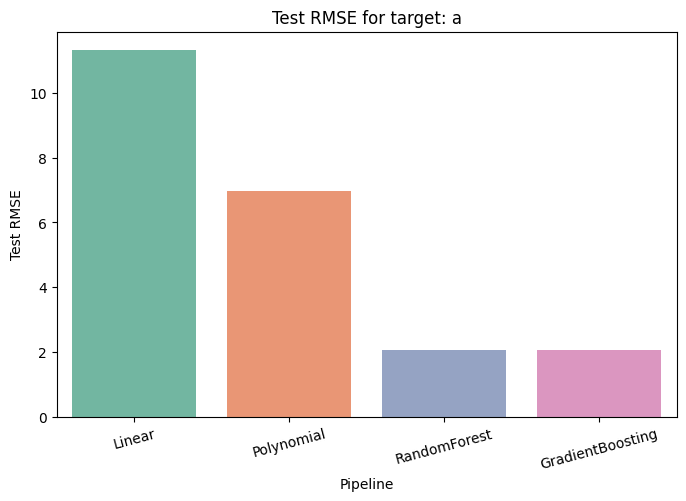

/tmp/ipython-input-3856837280.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pipeline_names, y=rmse_list, palette='Set2')


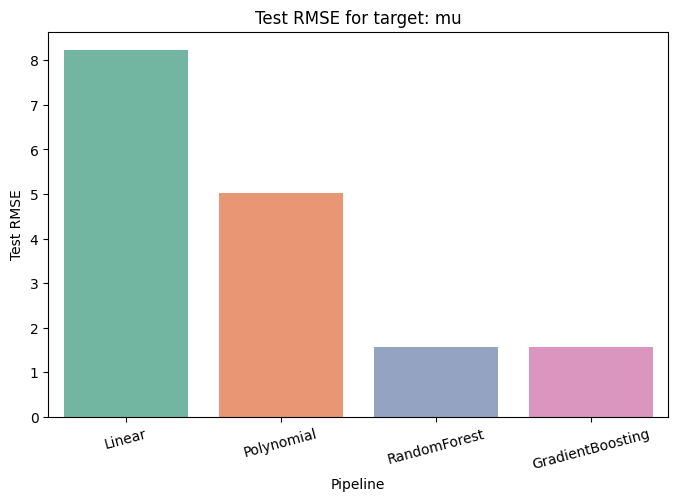

/tmp/ipython-input-3856837280.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pipeline_names, y=rmse_list, palette='Set2')


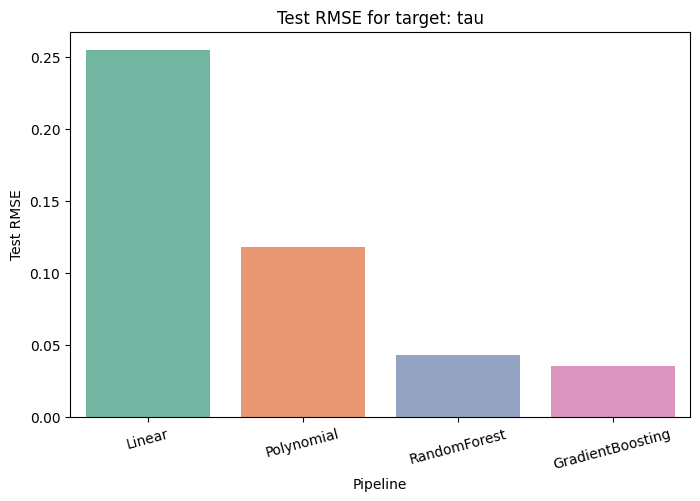

/tmp/ipython-input-3856837280.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pipeline_names, y=rmse_list, palette='Set2')


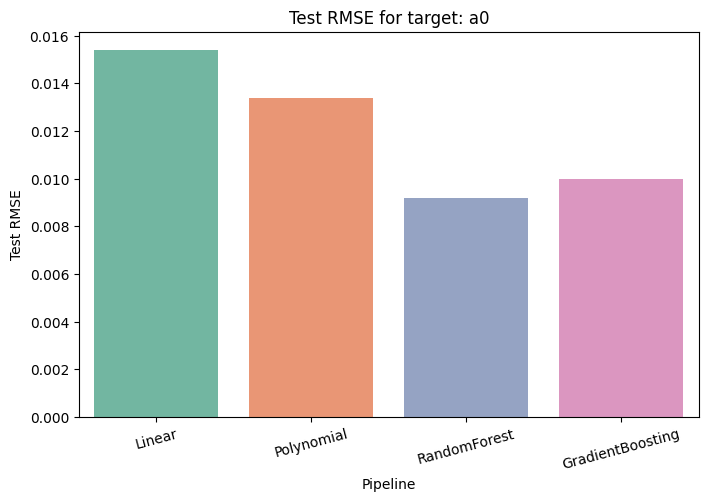

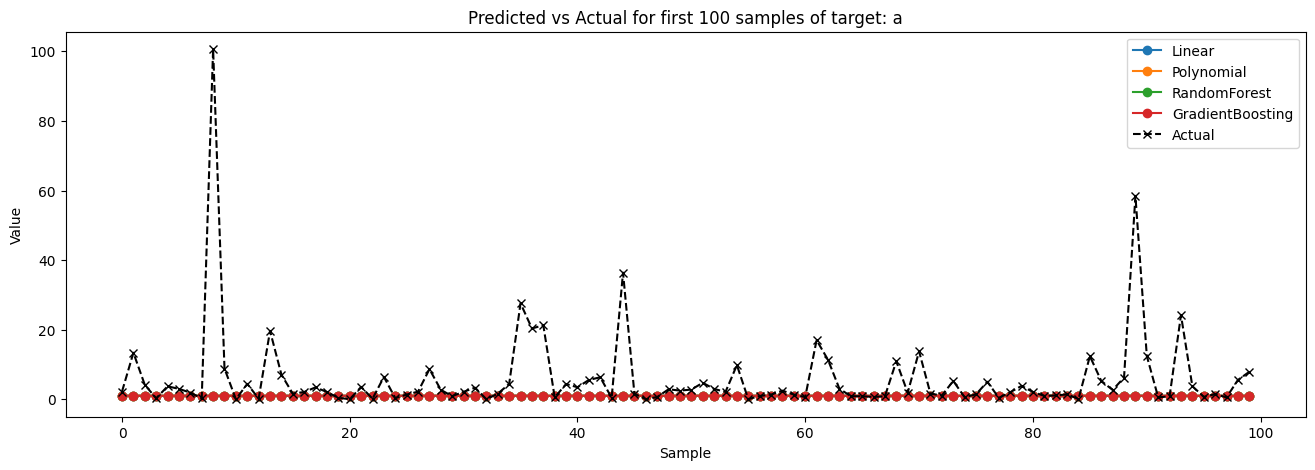

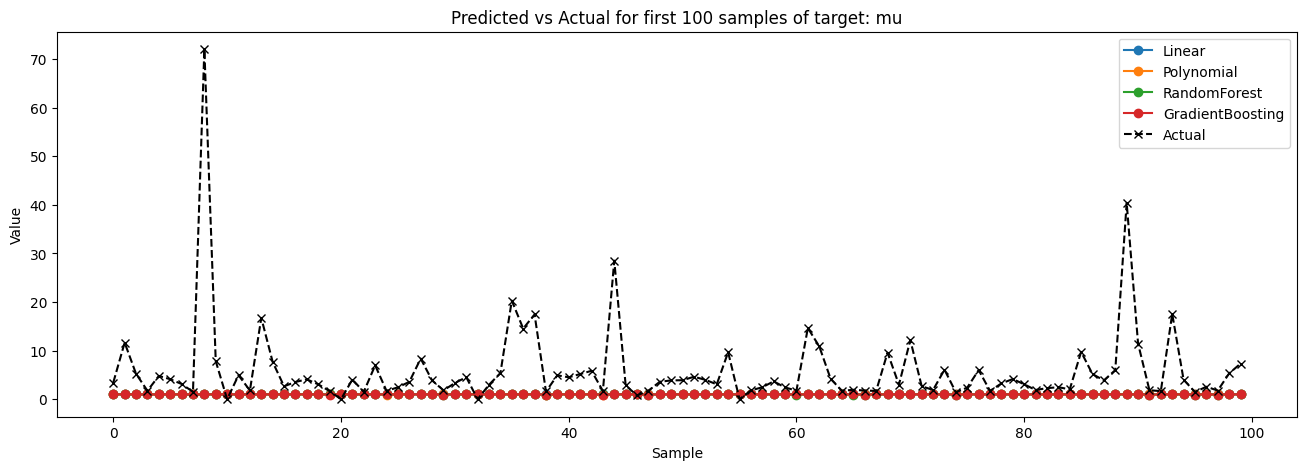

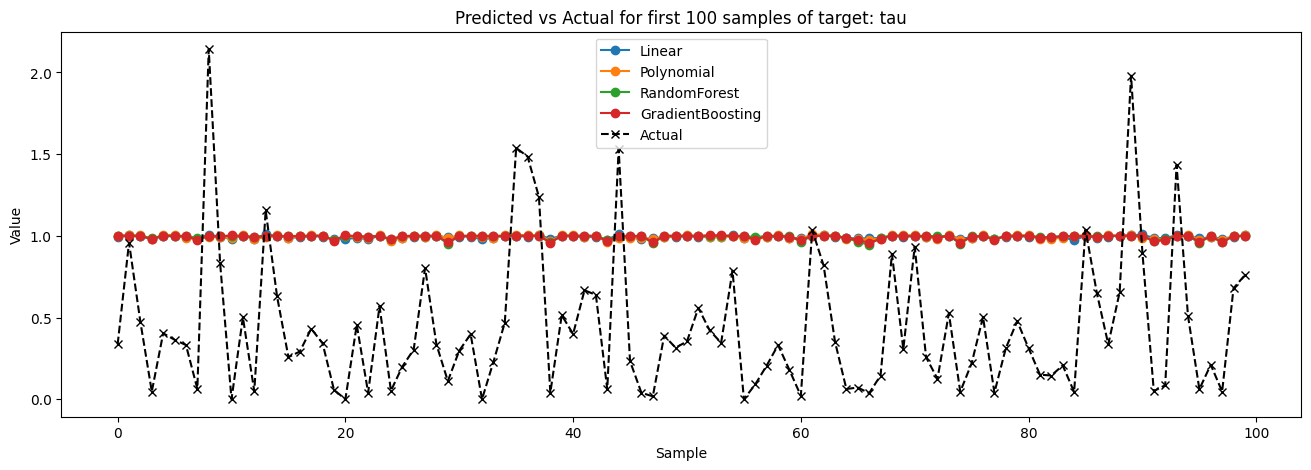

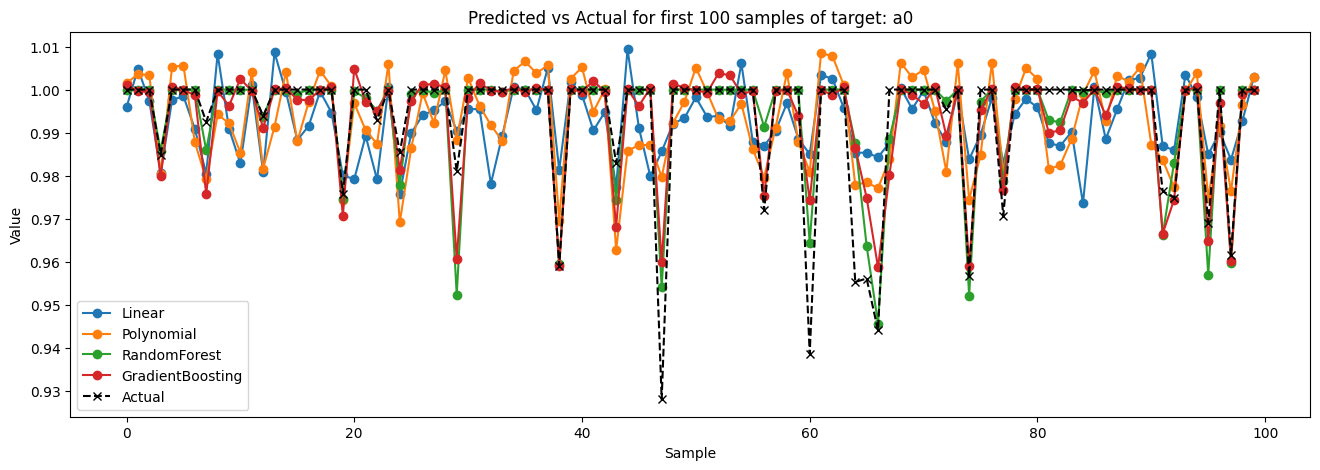

In [ ]:
# Test RMSE score across different models for each target variable
for target in targets:
    rmse_list = [metrics['Test RMSE'] for metrics in final_results[target].values()]
    pipeline_names = list(final_results[target].keys())

    plt.figure(figsize=(8, 5))
    sns.barplot(x=pipeline_names, y=rmse_list, palette='Set2')
    plt.title(f'Test RMSE for target: {target}')
    plt.ylabel('Test RMSE')
    plt.xlabel('Pipeline')
    plt.xticks(rotation=15)
    plt.show()


# Line Plot of Predictions vs Actual for the first 50 samples

for target in targets:
    X_test = data_splits[target]['X_test']
    y_test = data_splits[target]['y_test']

    plt.figure(figsize=(16, 5))
    plt.title(f'Predicted vs Actual for first 100 samples of target: {target}')

    for model_name, model_info in final_results[target].items():
        y_pred = model_info['Best Model'].predict(X_test)[:100]
        plt.plot(range(100), y_pred, marker='o', linestyle='-', label=model_name)

    plt.plot(range(100), y_test[:100], marker='x', linestyle='--', color='black', label='Actual')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.show()



## Result

The performance of the four pipelines (Linear Regression, Polynomial Regression, Random Forest and Gradient Boosting) was evaluated for each bacterial growth parameter (`a`, `mu`, `tau`, `a0`) using the validation and test sets. The metrics used were **Root Mean Squared Error (RMSE)** and **R² score**. The results are summarised below.

### Target: a
| Model              | Validation RMSE | Test RMSE | Test R² |
|-------------------|----------------|-----------|---------|
| Linear             | 11.3673        | 11.3234   | 0.2814  |
| Polynomial         | 7.1860         | 6.9697    | 0.7278  |
| Random Forest      | 2.3483         | 2.0660    | 0.9761  |
| Gradient Boosting  | 2.4653         | 2.2673    | 0.9712  |

### Target: mu
| Model              | Validation RMSE | Test RMSE | Test R² |
|-------------------|----------------|-----------|---------|
| Linear             | 8.2086         | 8.2299    | 0.2936  |
| Polynomial         | 5.1726         | 5.0135    | 0.7379  |
| Random Forest      | 1.7534         | 1.5649    | 0.9745  |
| Gradient Boosting  | 1.8044         | 1.8046    | 0.9660  |

### Target: tau
| Model              | Validation RMSE | Test RMSE | Test R² |
|-------------------|----------------|-----------|---------|
| Linear             | 0.2592         | 0.2549    | 0.6254  |
| Polynomial         | 0.1183         | 0.1177    | 0.9202  |
| Random Forest      | 0.0315         | 0.0430    | 0.9893  |
| Gradient Boosting  | 0.0360         | 0.0393    | 0.9911  |

### Target: a0
| Model              | Validation RMSE | Test RMSE | Test R² |
|-------------------|----------------|-----------|---------|
| Linear             | 0.0145         | 0.0154    | 0.2069  |
| Polynomial         | 0.0128         | 0.0134    | 0.3988  |
| Random Forest      | 0.0090         | 0.0092    | 0.7193  |
| Gradient Boosting  | 0.0113         | 0.0118    | 0.5374  |




## Discussion

The results show clear differences in performance across models and targets:

1. **Linear Regression** consistently performed the worst, with the highest RMSE and lowest R² values for all targets. This indicates that the relationship between the environmental features and bacterial growth parameters is **highly non-linear** and cannot be captured properly by a simple linear model.

2. **Polynomial Regression** improved performance over Linear Regression, particularly for `mu` and `tau`, by capturing some non-linear effects. However, it still underperformed compared to tree based models.

3. **Random Forest** achieved the best performance for most targets, with the lowest test RMSE and highest R² for `a`, `mu` and `a0`. Its ability to model **feature interactions** and non-linearities likely contributed to this performance.

4. **Gradient Boosting** performed extremely well for `tau` and also achieved strong results for other targets, slightly outperforming Random Forest for `tau` in R². Its sequential learning approach allows it to correct errors from previous iterations.

5. **Target difficulty**: `tau` and `a0` were generally more challenging, as suggested by the EDA correlations. Despite this, tree-based models successfully captured complex patterns, resulting in high predictive accuracy.

Overall, these findings highlight the importance of exploring multiple pipelines and tuning hyperparameters, as ensemble methods (Random Forest and Gradient Boosting) clearly outperform simpler regression approaches for non-linear, interaction heavy datasets.

## Conclusion

Four independent regression pipelines were developed to predict bacterial growth parameters (`a`, `mu`, `tau`, `a0`) using environmental features (`n_cyanos`, `co2`, `light`, `SucRatio`). The models were trained on 70% of the data, tuned on 15% validation and evaluated on a 15% test set.

- **Tree-based ensemble methods**, which is Random Forest and Gradient Boosting, provided the most accurate predictions across all targets.
- **Linear and Polynomial Regression** served as baselines but were insufficient for capturing non-linear interactions.
- The train/validation/test splits ensured **fair evaluation and prevented information leakage**.
- **Future work** could explore additional features, feature interactions or multi-output regression to further improve performance.

These results demonstrate a systematic approach to designing, evaluating and interpreting machine learning pipelines for regression tasks.

## References

1. Yildirim-Yalcin M, Yucel O, Tarlak F. Development of prediction software to describe total mesophilic bacteria in spinach using a machine learning-based regression approach. *Food Sci Technol Int.* 2025 Jan;31(1):3-10. doi: 10.1177/10820132231170286. Epub 2023 Apr 18. PMID: 37073088.

2. Tarlak F. Machine Learning-Based Software for Predicting Pseudomonas spp. Growth Dynamics in Culture Media. *Life (Basel).* 2024 Nov 15.

3. https://www.datacamp.com/tutorial/rmse

4. https://www.geeksforgeeks.org/machine-learning/ml-r-squared-in-regression-analysis/

5. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

6. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html